**Brian Blaylock**  
*June 15, 2022*

# Show Model Terrain/Land Mask and Grid Points

In [1]:
from herbie import Herbie
from toolbox.cartopy_tools import common_features, pc
import matplotlib.pyplot as plt

🥳 Herbie loaded your custom templates.


In [42]:
# Retrieve HRRR land mask and terrain height as an xarray DataSet
H = Herbie('2022-06-15')
ds = H.xarray('(HGT|LAND):surface')
ds

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2022-Jun-15 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/p/home/blaylock/BB_python/Herbie/herbie/archive.py:668: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2022-06-15
    step                 timedelta64[ns] 00:00:00
    surface              float64 0.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2022-06-15
Dimensions without coordinates: y, x
Data variables:
    lsm                  (y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    orog                 (y, x) float32 -0.01786 -0.01786 ... -0.01786 -0.01786
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /p/cwfs/blaylock/data/hrrr/20220615/subset_c027d...
    searchString:            (HGT|LAND):surface

cfgrib variable: orog
GRIB_cfName geopotential_height
GRIB_cfVarName orog
GRIB_name Orography
GRIB_units m
GRIB_typeOfLevel surface



/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:355: UserWarning: More than one time coordinate present for variable "lsm".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:355: UserWarning: More than one time coordinate present for variable "orog".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<GeoAxesSubplot:title={'left':'Run: 00:00 UTC 15 Jun 2022 F00','center':'HRRR  surface\n','right':'Valid: 00:00 UTC 15 Jun 2022'}>

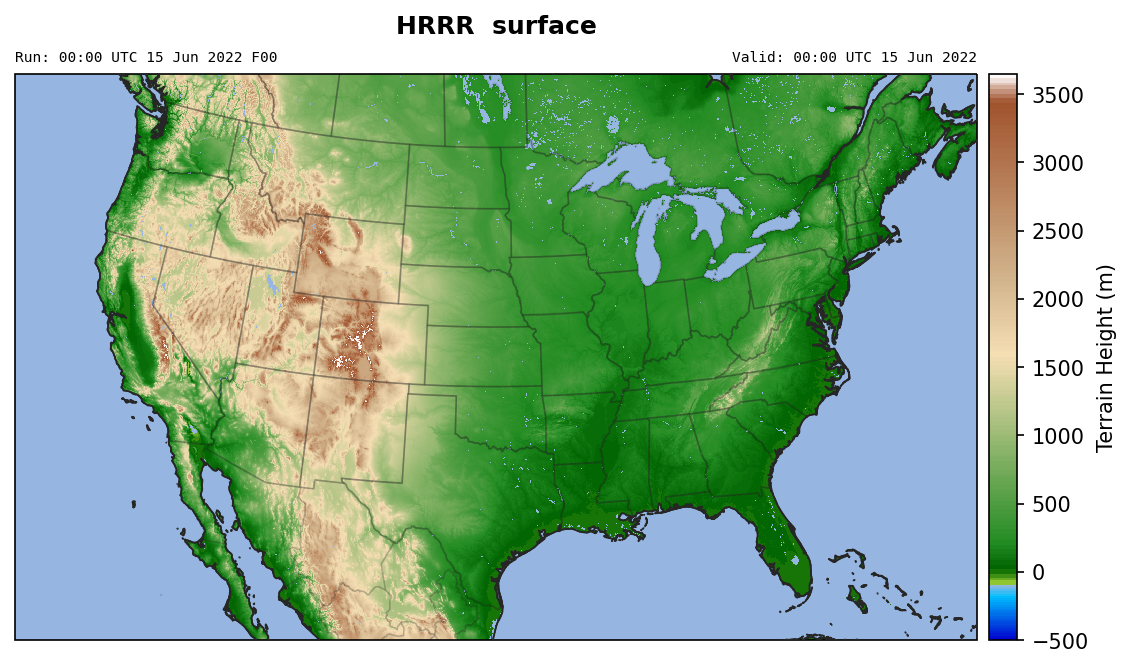

In [3]:
# Plot terrain height on a map
ax = common_features("10m", crs=ds.herbie.crs).STATES().ax
ds.herbie.plot(ax=ax, vars='orog')

## Show HRRR Grid Point Locations Around Salt Lake City

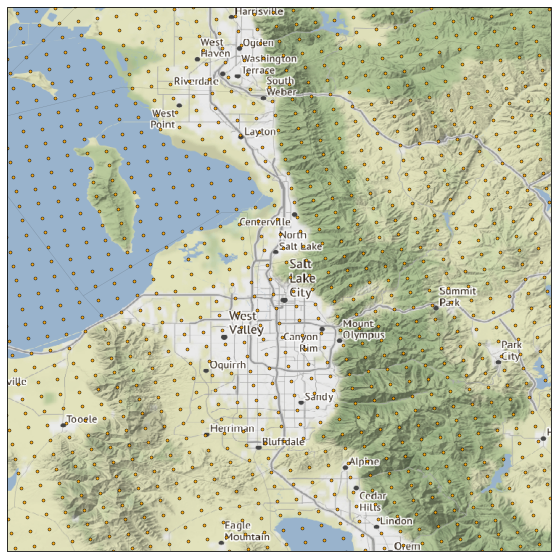

In [34]:
ax = common_features('10m', figsize=[10,10]).STAMEN(style='terrain', zoom=10).COUNTIES().ax

lat = 40.8
lon = -111.9
pad = 0.5
ax.set_extent([lon-pad, lon+pad, lat-pad, lat+pad], crs=pc)

ax.scatter(ds.longitude, ds.latitude, marker='.', c='orange', alpha=.9, ec='k', lw=.5)

## Plot lat lon grid from `HRRR_latlon.h5` file

In [2]:
import xarray as xr

In [1]:
%%bash
echo 
# Uncomment line below and run cell to download HRRR_latlon.h5 file
#wget https://hrrrzarr.s3.amazonaws.com/grid/HRRR_latlon.h5

In [11]:
ds2 = xr.open_dataset("./HRRR_latlon.h5")
ds2

<xarray.Dataset>
Dimensions:    (phony_dim_0: 1059, phony_dim_1: 1799)
Dimensions without coordinates: phony_dim_0, phony_dim_1
Data variables:
    latitude   (phony_dim_0, phony_dim_1) float64 ...
    longitude  (phony_dim_0, phony_dim_1) float64 ...

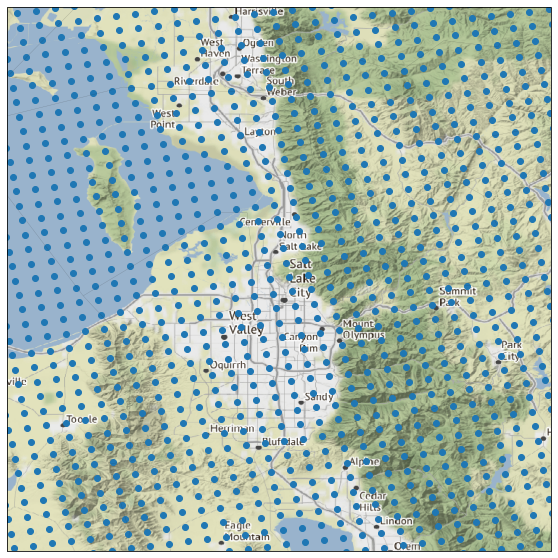

In [10]:
ax = common_features(figsize=[10,10]).STAMEN(style='terrain', zoom=10).COUNTIES().ax

lat = 40.8
lon = -111.9
pad = 0.5
ax.set_extent([lon-pad, lon+pad, lat-pad, lat+pad], crs=pc)

ax.scatter(ds2.longitude, ds2.latitude)